# Chicago Crime Analysis
## by Ebele Shaba

## Introduction
> This dataset was generated from the Onecampus Academy library. It is a crime dataset collected over a period of time from Chicago, USA. It originally contains 2,278,726 entries and 23 columns of information about individuals who committed crime, and the FBI's documentation of such crimes in Chicago.

> The goal of the project is to wrangle the data, generate insights to the patterns of crime and create data visualisations to analyse and represent the crime dataset.

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the crime data dateset
df = pd.read_csv('crime_data.csv')
# Generating important details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [3]:
# A five row overview of the crime dataset
df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [4]:
# Statistics of the crime data
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.278726e+06,2.278726e+06,2.278726e+06,2.278714e+06,2.094031e+06,2.094459e+06,2.254741e+06,2.254741e+06,2.278726e+06,2.254741e+06,2.254741e+06
mean,1.139362e+06,6.882068e+06,1.186442e+03,1.129072e+01,2.272764e+01,3.752140e+01,1.164569e+06,1.885747e+06,2.009638e+03,4.184209e+01,-8.767161e+01
std,6.578117e+05,3.419168e+06,7.026836e+02,6.946692e+00,1.383464e+01,2.153282e+01,1.673955e+04,3.209855e+04,6.019724e+00,8.830434e-02,6.073538e-02
min,0.000000e+00,6.370000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,5.696812e+05,3.716076e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152948e+06,1.859053e+06,2.004000e+03,4.176866e+01,-8.771379e+01
50%,1.139362e+06,6.885990e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166060e+06,1.890673e+06,2.009000e+03,4.185578e+01,-8.766597e+01
75%,1.709044e+06,9.887568e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909219e+06,2.014000e+03,4.190668e+01,-8.762823e+01
max,2.278725e+06,1.278199e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01


In [5]:
# Locating missing values
df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [6]:
# Locating duplicate values
df.duplicated().sum()

0

## Data Assessing
#### checking for tidiness and quality issues in the dataset.

> Prescence of missing rows. Missing rows will be dropped to avoid messing up the dataset.

> Irrelevant columns. Unnecessary and irrelvant columns which includes;Unnamed: 0,ID,IUCR,Beat,Community Area,FBI Code,X Coordinate,Y Coordinate should be dropped to avoid complicating the dataset.

> Changing the date datatype from object to datetime

>Spaces between words in column titles. Renaming columns titles to remove space between words


## Data Cleaning

In [7]:
# Dropping all the null values and ensuring all the columns have equal amount of non null values for efficiency.
df = df.dropna()
print(df.notnull().sum())

Unnamed: 0              2070581
ID                      2070581
Case Number             2070581
Date                    2070581
Block                   2070581
IUCR                    2070581
Primary Type            2070581
Description             2070581
Location Description    2070581
Arrest                  2070581
Domestic                2070581
Beat                    2070581
District                2070581
Ward                    2070581
Community Area          2070581
FBI Code                2070581
X Coordinate            2070581
Y Coordinate            2070581
Year                    2070581
Updated On              2070581
Latitude                2070581
Longitude               2070581
Location                2070581
dtype: int64


In [8]:
# Dropping unnecessary columns
df.drop(['Unnamed: 0','ID','IUCR','Beat','Community Area','FBI Code','X Coordinate','Y Coordinate','Location'], 
        axis=1, inplace=True)
# Generating important details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070581 entries, 0 to 2278725
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Block                 object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Arrest                bool   
 7   Domestic              bool   
 8   District              float64
 9   Ward                  float64
 10  Year                  int64  
 11  Updated On            object 
 12  Latitude              float64
 13  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(7)
memory usage: 209.3+ MB


In [9]:
# Generating important details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070581 entries, 0 to 2278725
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Block                 object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Arrest                bool   
 7   Domestic              bool   
 8   District              float64
 9   Ward                  float64
 10  Year                  int64  
 11  Updated On            object 
 12  Latitude              float64
 13  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(7)
memory usage: 209.3+ MB


In [10]:
 # Renaming column titles to remove space between words
df.rename(columns= {'Updated On':'UpdatedOn', 'Case Number':'CaseNumber', 'Primary Type':'PrimaryType', 
                    'Location Description':'LocDescription'}, inplace=True)

## Feature Engineering

> Extracting revelvant information such as month, day, period etc. from existing columns(Date, UpdatedOn)

In [11]:
# Importing necessary packages
from dateutil.parser import parse
from datetime import datetime


# Creating a for loop to insert the period of day for every entry
tCol = df.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
daynameList = []
periodList = []
for row in List:
    dayname = row[0][0:4]
    #month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<6:
        period = 'Evening' 
    elif row[1] =='PM' and int(row[0][11:13])>5:
        period = 'Night'
    else:
        period = 'Unknown'
        
    daynameList.append(dayname)
    periodList.append(period)
    
print(len(daynameList), len(periodList))    

df['DayName'] = daynameList
df['Period']= periodList #Creating a new column that contains the generated entries.

2070581 2070581


In [12]:
# Changing the datatype from object to datetime for the Date and UpdatedOn columns
df[['Date','UpdatedOn']] = df[['Date','UpdatedOn']].apply(pd.to_datetime)
#df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d %H:%M:%S.%f')

In [13]:
# Separting the time and date from the Date column and creating new columns for the variables
df['nDate']= df['Date'].dt.date
df['Time']= df['Date'].dt.time

In [14]:
# Separting the updated time and updated date from the UpdatedOn column and creating new columns for the variables
df['UpdatedDate']= df['UpdatedOn'].dt.date
df['UpdatedTime']= df['UpdatedOn'].dt.time

In [15]:
# Changing the datatype from object to datetime for the nDate and UpdatedDate columns
df['nDate'] = pd.to_datetime(df['nDate'])
df['UpdatedDate'] = pd.to_datetime(df['UpdatedDate'])

In [16]:
# Creating new: year, month and day columns from the nDate and UpdatedOn columns
df['Month']= df['nDate'].dt.month
df['Day']= df['nDate'].dt.day

In [17]:
# Creating day type column from the Day column
wkList = []
for day in list(df.DayName):
    if day in ['Sat ', 'Sun ']:
        wkList.append('Weekend')
    else:
        wkList.append('Weekday')
df['DayType'] = wkList 

In [18]:
df['DayType'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [19]:
# Dropping Unnecessary columns
df.drop(['Date','UpdatedOn'], axis=1, inplace=True)

In [20]:
# Renaming the nDate column to Date
df.rename(columns={'nDate':'Date'}, inplace=True)

In [21]:
# Rearranging the columns for orderly presentation
crime_df = df.reindex(columns=['CaseNumber','Block','PrimaryType','Description','LocDescription','Arrest',
                               'Domestic','District','Ward','Latitude','Longitude','Date','Time','Year','Month',
                               'Day','DayName','Period','DayType','UpdatedDate','UpdatedTime'])

In [22]:
# Checking to see if the new columns where properly created
crime_df.head()

,CaseNumber,Block,PrimaryType,Description,LocDescription,Arrest,Domestic,District,Ward,Latitude,...,Date,Time,Year,Month,Day,DayName,Period,DayType,UpdatedDate,UpdatedTime
0,HP485721,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,10.0,41.739980,...,2008-07-26,14:30:00,2008,7,26,Sat,Afternoon,Weekend,2018-02-28,15:56:25
1,JB372830,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,8.0,41.726922,...,2018-07-31,10:57:00,2018,7,31,Tue,Morning,Weekday,2018-08-07,16:02:59
2,HN308568,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,39.0,41.994138,...,2007-04-27,10:30:00,2007,4,27,Fri,Morning,Weekday,2018-02-28,15:56:25
3,JB361368,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,28.0,41.881217,...,2018-07-23,08:55:00,2018,7,23,Mon,Morning,Weekday,2018-07-30,15:52:24
4,JE297624,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,27.0,41.874174,...,2021-07-11,06:40:00,2021,7,11,Sun,Morning,Weekend,2021-07-18,16:56:02


In [23]:
# Checking to see if the new columns where properly created
# Generating important details about the dataset
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070581 entries, 0 to 2278725
Data columns (total 21 columns):
 #   Column          Dtype         
---  ------          -----         
 0   CaseNumber      object        
 1   Block           object        
 2   PrimaryType     object        
 3   Description     object        
 4   LocDescription  object        
 5   Arrest          bool          
 6   Domestic        bool          
 7   District        float64       
 8   Ward            float64       
 9   Latitude        float64       
 10  Longitude       float64       
 11  Date            datetime64[ns]
 12  Time            object        
 13  Year            int64         
 14  Month           int64         
 15  Day             int64         
 16  DayName         object        
 17  Period          object        
 18  DayType         object        
 19  UpdatedDate     datetime64[ns]
 20  UpdatedTime     object        
dtypes: bool(2), datetime64[ns](2), float64(4), int64(3), o

In [24]:
# Storing the gathered data into the below csv.
crime_df.to_csv('CrimeData.csv')

### What is the structure of your dataset?
> After data assessing, cleaning and feature extraction, the dataset now has 2,070,581 entries and 21 columns which was initially 2,278,726 entries and 23 columns. About 9 columnns were added and 11 columns dropped. 5 columns were renamed for uniformity and presentation. The crime dataset has a combination of different data types in their correct form ready for data visualisation.

### What is/are the main feature(s) of interest in your dataset?
> Most of the features in the data are relevant for visualisation as unnecessary columns have been long dropped however some features can be further highlighted. They are;

> PrimaryType: The types of crimes that were committed by the criminals

> Arrests: How many arrests were made?

> Domestic: How many crimes were domestic?

> District/Location: Where the crimes were committed

> Time/Date/Year/Month/Day/Period/DayType: When the crimes where committed

## Data Visualisation and Insight Generation

### Unvariate Analysis

In [25]:
# Univariate bar chart creation with 'bar' function for different features.
def bar(var1,var2,var3,var4):
    plt.figure(figsize = [10,7])
    base_color = sns.color_palette()[4]
    sns.countplot(x=var1, data=crime_df, color = base_color)
    labels = plt.xticks(rotation=var2)
    plt.title(var3)
    plt.xlabel(var4, fontsize=10);

#### Which crimes are most likey to happen?

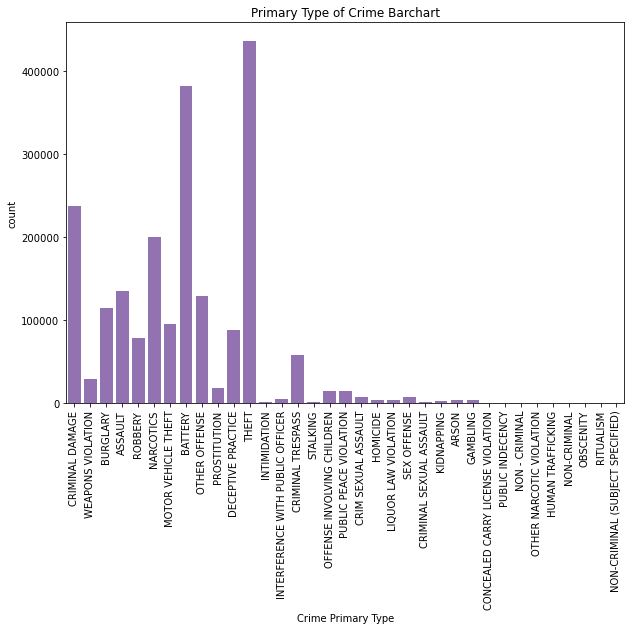

In [26]:
# Placing PrimaryType feature into the bar function.
bar('PrimaryType', 90, 'Primary Type of Crime Barchart', 'Crime Primary Type')

#### Insight
>Crime count analysis carried out on the types of crime from year 2001 to 2022 shows that theft is the most common type of crime. The top five crimes are Theft, Battery, Criminal violation, Narcotics and Assault. Some of these crimes may be related to low jobs and low paying jobs hence, criminals maybe prone to quick wealth. Perhaps, the community may be sensitized on the importance of dignified wealth to reduce crime.

#### What periods of the day will crimes happen?

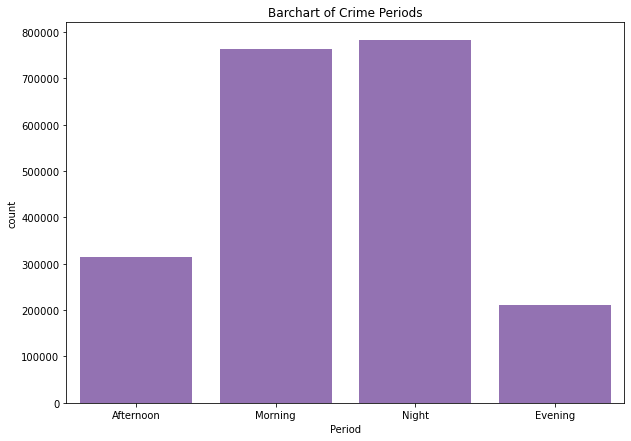

In [27]:
# Placing Period feature into the bar function.
bar('Period', 0, 'Barchart of Crime Periods', 'Period')

#### Insight
>From the above the periods that are not safe for people to go out are in the mornings and nights. This may be because there are not street lights or because people cars are not patroling at these hours. Whatever the reason maybe citizens should be advised to stay indoors or move with a group of people at  these times.

In [50]:
TopLoc= crime_df.LocDescription.value_counts().head(10)
TopLoc

STREET                            530430
RESIDENCE                         342699
APARTMENT                         239322
SIDEWALK                          203853
OTHER                              72077
PARKING LOT/GARAGE(NON.RESID.)     54754
ALLEY                              46316
SMALL RETAIL STORE                 39603
SCHOOL, PUBLIC, BUILDING           39152
RESIDENCE-GARAGE                   36433
Name: LocDescription, dtype: int64

#### Which locations are the unsafest ones?

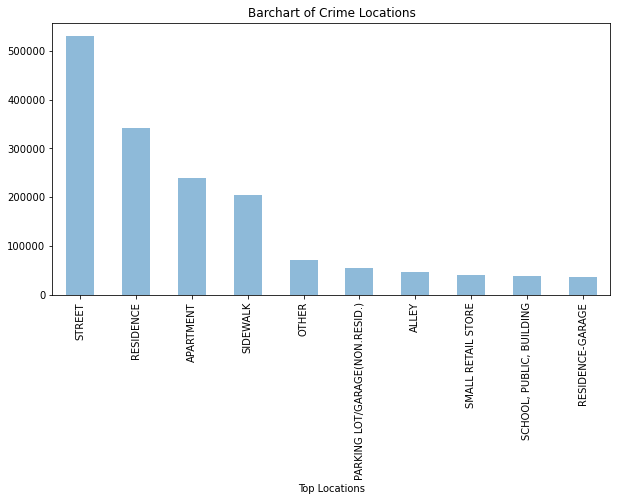

In [56]:
# Visualizing the locations with the most crime 
TopLoc.plot(kind='bar', title='Barchart of Crime Locations', alpha=0.5, figsize=(10,5))
plt.xlabel('Top Locations')
plt.show();

#### Insight
>For simple analysis, the top ten locations where crime occurs were captured only. Residents should take care when passing through these areas to avoid becoming victims. Also more patrols should be carried out in these locations especially the streets, residensial areas, the sidewalk and so on.

#### In which locations will crime likely happen?

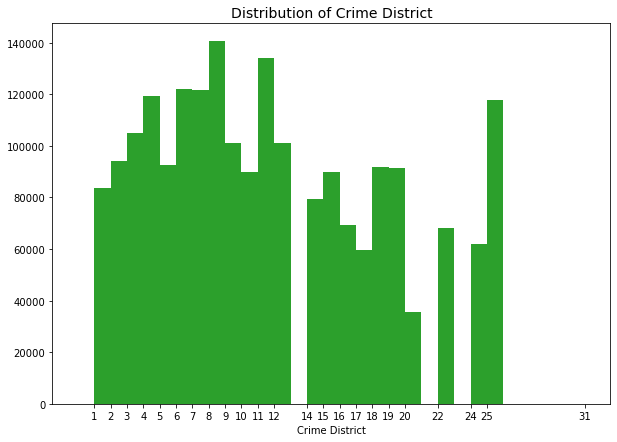

In [28]:
## Creation of a histogram to show the crime distribution in the districts
plt.figure(figsize = [10,7])
base_color = sns.color_palette()[2]
bins= np.arange(0, crime_df['District'].max()+1, 1) # width of the bars
plt.hist(data=crime_df, x='District', bins=bins, color=base_color)
plt.title('Distribution of Crime District', fontsize=14)
plt.xlabel('Crime District', fontsize=10)
ticks = [1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,22,24,25,31]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

#### Insight
>Most of the Districts above have high crime rates, it may be said that Chicago is a generally unsafe place to live in especially for the elderly and familys with children. Also why are crime rates so high? Should laws be reinforced with dire punishments to curtail crimes?

In [61]:
# Line chart creation with 'line' function for different features.
def line(var1,var2,var3):
    base_color = sns.color_palette()[7]
    crime_df[var1].value_counts().sort_index().plot(kind='line', marker='d', color=base_color)
    plt.title(var2)
    plt.xlabel(var3, fontsize=10);

#### How are the crime trends over days, month and year? which dates have the highest pick?

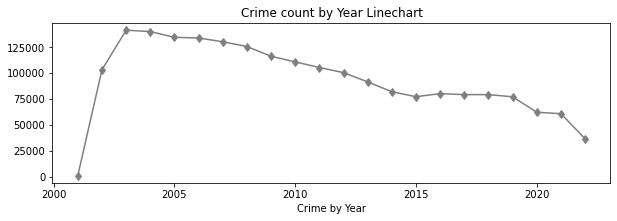

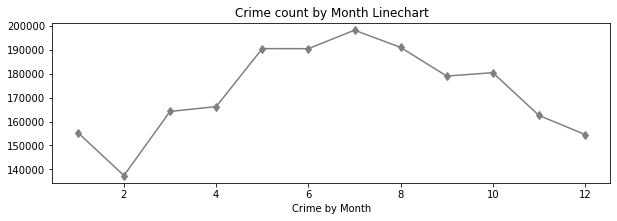

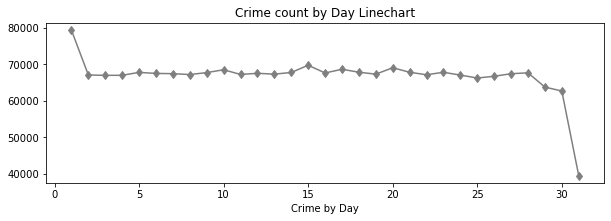

In [62]:
# creation of multiple subplots 

# Placing Year feature into the line function
plt.figure(figsize = [10,10])
plt.subplot(3,1,1)
line('Year','Crime count by Year Linechart','Crime by Year');

# Placing Month feature into the line function
plt.figure(figsize = [10,10])
plt.subplot(3,1,2)
line('Month','Crime count by Month Linechart','Crime by Month');

# Placing Day feature into the line function
plt.figure(figsize = [10,10])
plt.subplot(3,1,3)
line('Day','Crime count by Day Linechart','Crime by Day');

#### Insight
>The linecharts above are quite insightful, the first chart shows that crime gradually decreased over the years with the highest crime count in year 2003, the community must be doing something correct to achieve this feet.

>From the second chart crime count trends over 21 years shows that crimes majorly occurs during summer time and at the begining of fall. The hot/warm weather may be a contributing factor to increase in crime.

>Finally the third linechart shows an almost steady crime rate except on the first days of the month were an increase can be seen and the thirtyfirst day of the month with a sharp decrease.

In [31]:
# Bar chart creation with 'barr' function for different features.
def barr(var1,var3,var4):
    base_color = sns.color_palette()[3]
    day = crime_df[var1].value_counts(ascending=True)
    crime_order = day.index
    ax = sns.countplot(x=var1, data=crime_df, color=base_color, order=crime_order)
    plt.title(var3)
    plt.xlabel(var4, fontsize=10)
    # To show percentages
    total = float(len(crime_df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

#### What percentage of crime occurs during the week? When is crime most prevalent?

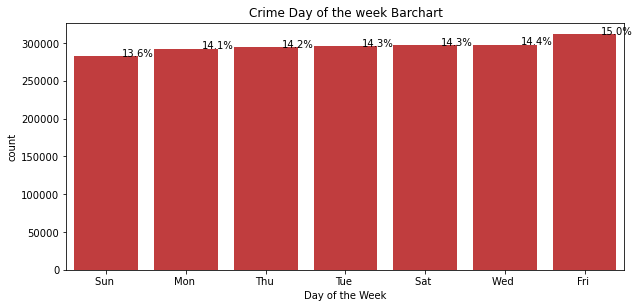

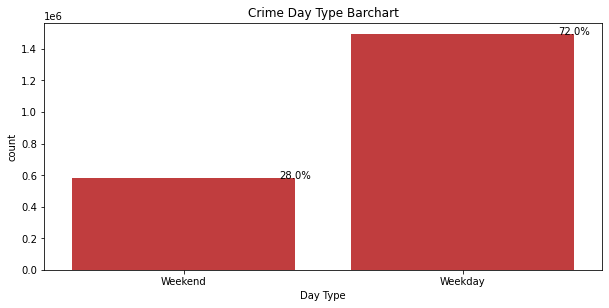

In [32]:
# creation of multiple subplots

# Placing DayName feature into the barr function
plt.figure(figsize = [10,10])
plt.subplot(2,1,1)
barr('DayName', 'Crime Day of the week Barchart' ,'Day of the Week')

# Placing DayType feature into the barr function
plt.figure(figsize = [10,10])
plt.subplot(2,1,2)
barr('DayType', 'Crime Day Type Barchart' ,'Day Type')

#### Insight
>The differences in the crime counts that happens during the week are not many, the percentage shows a ±2% from sun to sat. However further analysis shows that crimes occurs mostly during the week rather than on the weekends. This maybe because most individuals do not leave the comfort of the homes on the weekends for reasons like work or shopping.

In [33]:
# Pie chart creation with 'pie' function for different features
def pie(var1,var2,var3):
    plt.figure(figsize=(5,5))
    counts = crime_df[var1].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode=[0.05,0.05], startangle=90, counterclock=True)
    plt.legend(title=var2, bbox_to_anchor=(1,1.02), loc='upper left')
    plt.axis('square')
    plt.title(var3, fontsize=14);

#### Are arrests mostly successful? What percentage of arrests are successful? What percentage of arrests are not successful?

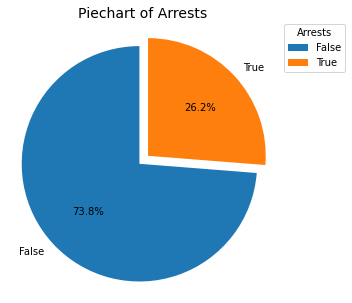

In [34]:
# Creating and plotting a piechart for the Arrest column
pie('Arrest','Arrests','Piechart of Arrests')

#### Insight
>Unfortunately the piechart shows that less amount of arrest were made successfully, 26.2% of crime to be exact are successfully made. The low rate of crime places a demand on the police department and city officals to answer a lot of questions and pay more mind to the community.

#### Are crimes mostly domestic? What percentage of crimes are domestic? What percentage of crimes are not domestic?

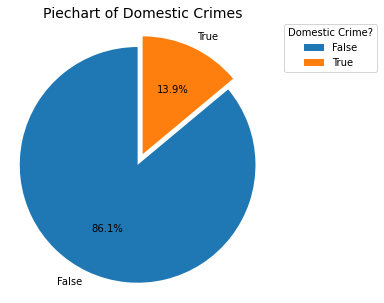

In [35]:
# Creating and plotting a piechart for the Domestic column
pie('Domestic','Domestic Crime?','Piechart of Domestic Crimes')

#### Insight
>From the piechart above, it can be concluded that domestic crimes(crimes that cause bodily harm for example rape) are low. The criminals may have more regard for human life than property. This a good discovery however the goal is to completely eradicate crime or atleast reduce them to the barest minimum

### Bivariate Analysis

In [36]:
# Creating a new dataframe for yearly_arrests using the group_by() function 
yearly_arrests = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
# Creating percentages for each value
yearly_arrests['Percentage'] = (100 * yearly_arrests / yearly_arrests.groupby(level=0).sum())
yearly_arrests.reset_index(level=[1],inplace=True)

#### How are the crime trends over the years in relation to successful arrests? 

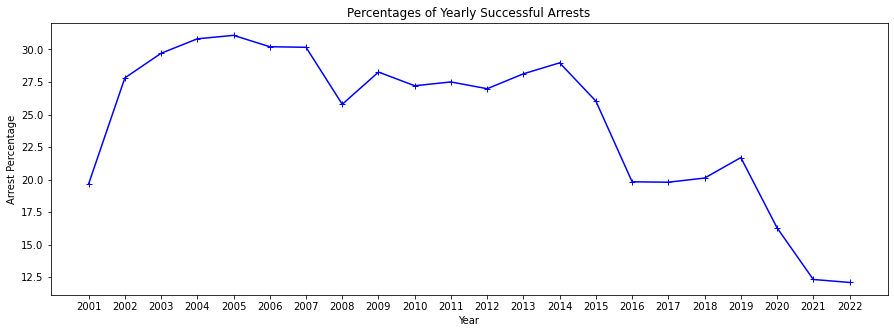

In [37]:
# Line chart for crime flunction over the years
plt.figure(figsize= [15, 5])
line = yearly_arrests[yearly_arrests['Arrest'] == True]['Percentage'] # Selecting only crimes arrested
labels = line.index.values
plt.title('Percentages of Yearly Successful Arrests')
plt.xlabel("Year")
plt.ylabel("Arrest Percentage")
plt.xticks(line.index, line.index.values)
line.plot(color='blue', marker='+')
plt.show;

#### Insight
>From the univariate analysis, the crime count trend over 21years were analysed, the chart above however shows the trends in relation to successful arrests. There is a decline with outliying peeks in 2009, 2014, and 2019 in succesful arrests, this may be due to the decline in crimes. The next visual may futher add context to the issue.

#### How are the crime trends over the years in relation to failed arrests? 

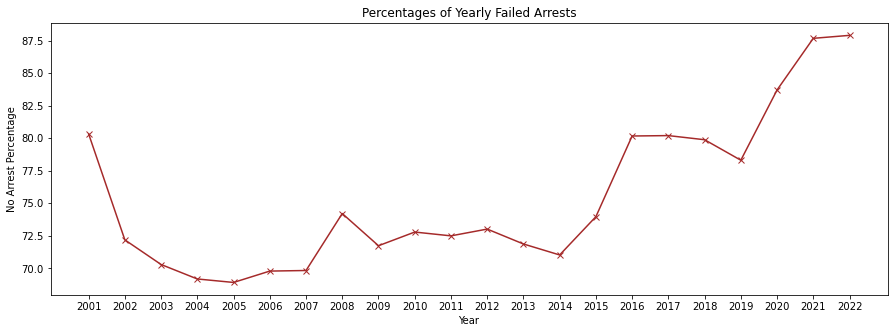

In [38]:
# Line chart for crime flunction over the years
plt.figure(figsize= [15, 5])
linep = yearly_arrests[yearly_arrests['Arrest'] == False]['Percentage'] # Selecting crimes that were not arrested
labels = linep.index.values
plt.title('Percentages of Yearly Failed Arrests')
plt.xlabel("Year")
plt.ylabel("No Arrest Percentage")
plt.xticks(linep.index, linep.index.values)
linep.plot(color='brown', marker='x')
plt.show;

#### Insight
>In the above chart with relation to the 'Percentages of Yearly Successful Arrests' chart, the opposite can be viewed. Failed arrests increases although there is a decline in crime counts over the 21years. Again, the police department and city officals must answer to the reasons why this is so.

In [39]:
# Creation of  rel function for bivariate clustered bar chart of various features against other features
def rel(W,X,Y,Z):
    ax = sns.countplot(data = crime_df, x = W, hue = X)
    plt.xlabel(Y, fontsize=10)
    plt.title(Z)
    plt.legend(title=X.title())
    total = float(len(crime_df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # To show percentages
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

#### What relationship is there between the day of the week and arrests, and the day of the week and domestic crimes? What conclusions can be infered?

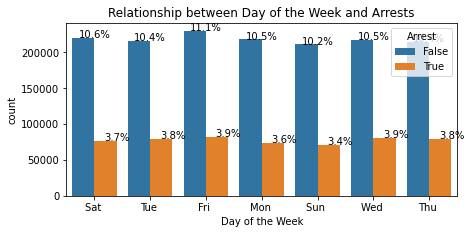

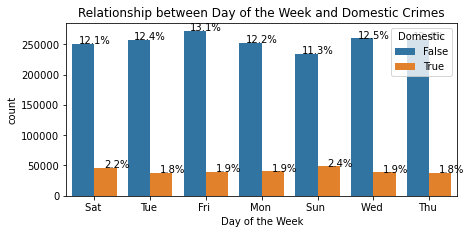

In [40]:
# creation of multiple subplots

# Placing DayName into the rel function in relation to the Arrest feature
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
rel('DayName', 'Arrest','Day of the Week','Relationship between Day of the Week and Arrests');

# Placing DayName into the rel function in relation to the Domestic feature
plt.figure(figsize=(7,7))
plt.subplot(2,1,2)
rel('DayName', 'Domestic','Day of the Week','Relationship between Day of the Week and Domestic Crimes');

#### Insight
>The comparison between the days of the week and arrest does not give a clear contrast.

>Similarily the comparison between the days of the week and domestic/non-domestic crimes does not give a clear contrast.

#### What relationship is there between the day type and arrests, and the day type and domestic crimes? What conclusions can be infered?

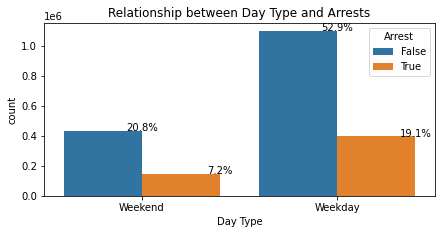

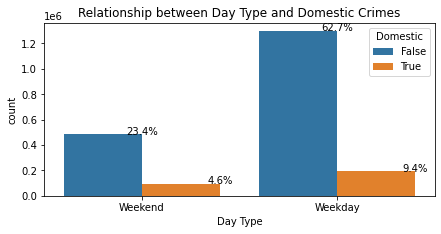

In [41]:
# creation of multiple subplots

# Placing DayType into the rel function in relation to the Arrest feature
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
rel('DayType', 'Arrest','Day Type','Relationship between Day Type and Arrests');

# Placing DayType into the rel function in relation to the Domestic feature
plt.figure(figsize=(7,7))
plt.subplot(2,1,2)
rel('DayType', 'Domestic','Day Type', 'Relationship between Day Type and Domestic Crimes');

#### Insight
>The charts above further establishes the fact that crimes occurs mostly during the week rather than on the weekends in Chicago, and there are less arrests and less domestic crimes accross board.

#### In which locations will crime likely happen at different periods of the day?

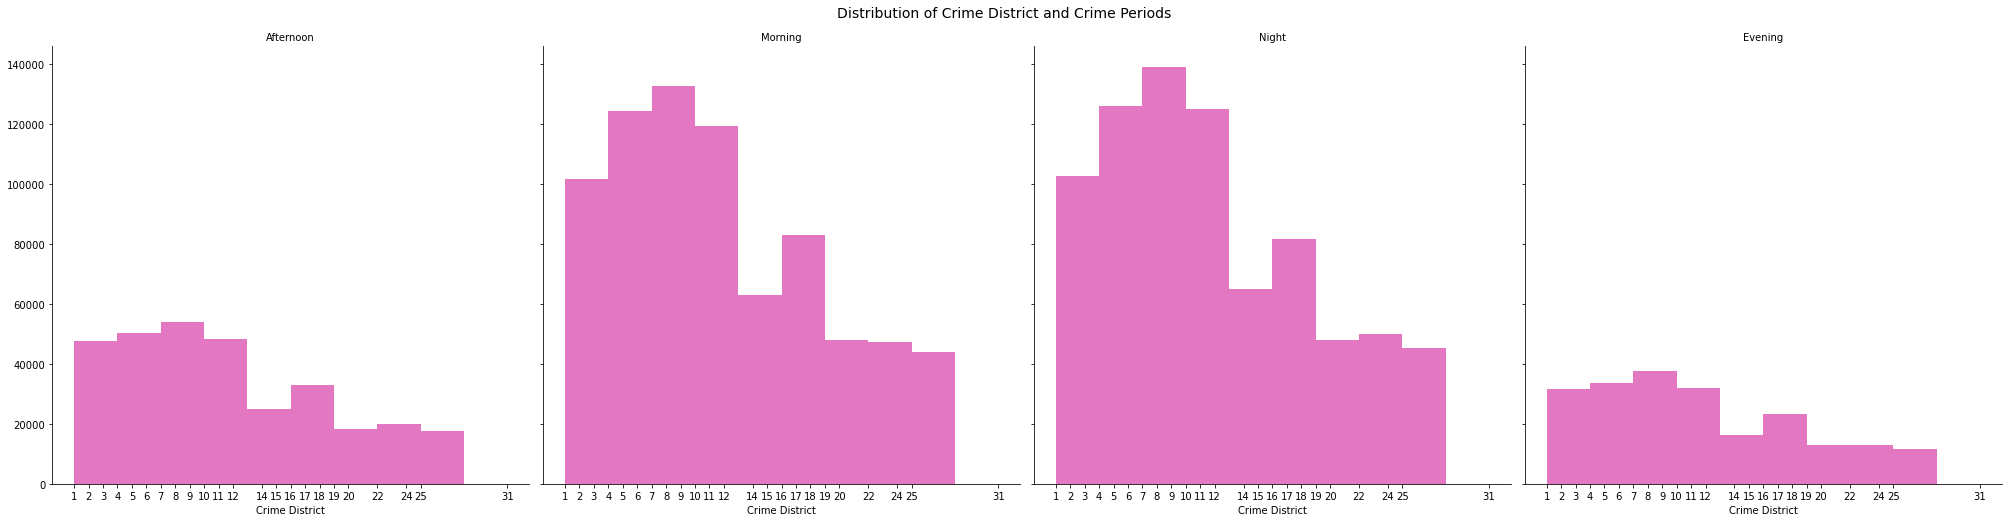

In [42]:
# Bivariate histograms creation for the distribution of the districts againt periods of crime
# Using facetgrid to show multiple plots
base_color = sns.color_palette()[6]
g = sns.FacetGrid(crime_df, col='Period', margin_titles=True, height=7)
g.map(plt.hist, 'District', color=base_color)
g.set_axis_labels('Crime District')
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Distribution of Crime District and Crime Periods', y=1.03, fontsize=14)
ticks = [1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,22,24,25,31]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

#### Insight
>Bivariate histogram showing the Districts have higher crime rates in the mornings and at night time emphasing that those periods that are not safe for people to go out. It can also be seen that the crimes are more prevalent in Districts 4-11. For the reasons that this is, citizens are advised to stay indoors or move with a group of people at these times and in Districts 4-11.

In [43]:
# Heatmap chart creation with 'cr_st' function for different features
def cr_st(var1,var2,var3,var4):
    # Use group_by() and size() to get the PrimaryType count and other features as a pandas Series
    crime_stat = crime_df.groupby(['PrimaryType', var1]).size()
    crime_stat = crime_stat.reset_index(name='count') # Use Series.reset_index() to convert a series into a dataframe object
    crime_stat = crime_stat.pivot(index = 'PrimaryType', columns = var1, values = 'count')
    sns.heatmap(crime_stat, annot = True, fmt='.0f')
    plt.xlabel(var2)
    plt.ylabel(var3)
    plt.title(var4)

#### How many arrests occurs or not for the crimes?

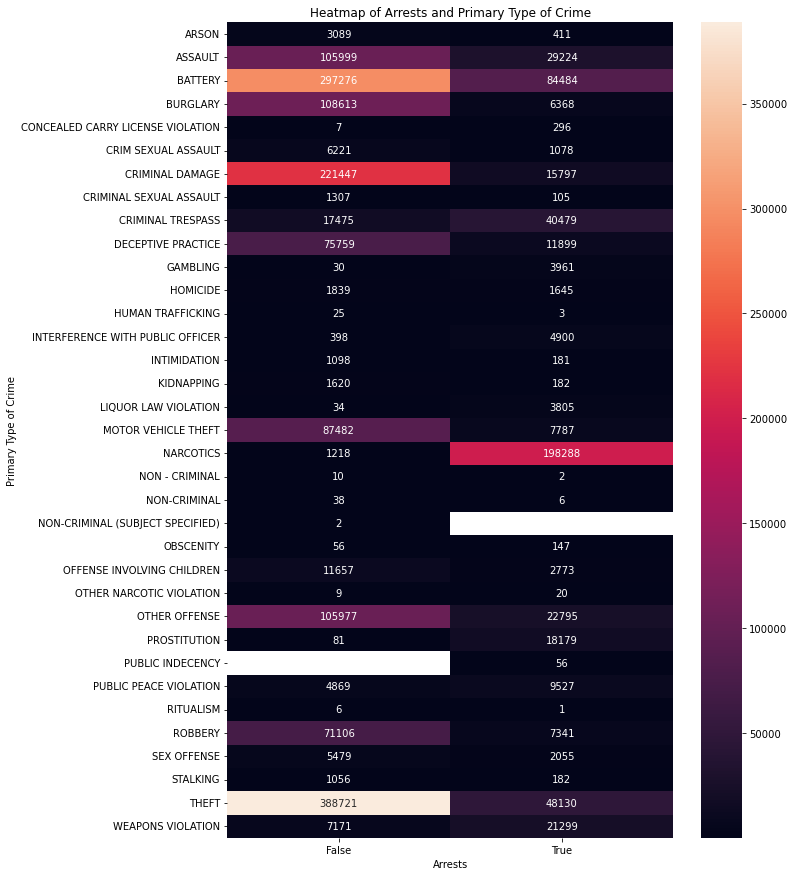

In [44]:
# Placing Arrest into the cr_st function in relation to the PrimaryType feature
plt.figure(figsize = [10,15])
cr_st('Arrest','Arrests','Primary Type of Crime', 'Heatmap of Arrests and Primary Type of Crime')

#### Insight
>The heatmap above gives the actual amount of successful and failed arrest of the crime types in Chicago. Theft which the topmost crime has 48130 arrests and 388721 failed arrests, this is not encouraging information. However some crimes has more successful arrests such as Narcotics, with 198288 arrests and 1218 failed arrests. Perhaps, more efforts are put in by the state officials and police department to catch criminals that commits offense related to Narcotics.

#### How crimes are domestic crimes or not domestic crimes?

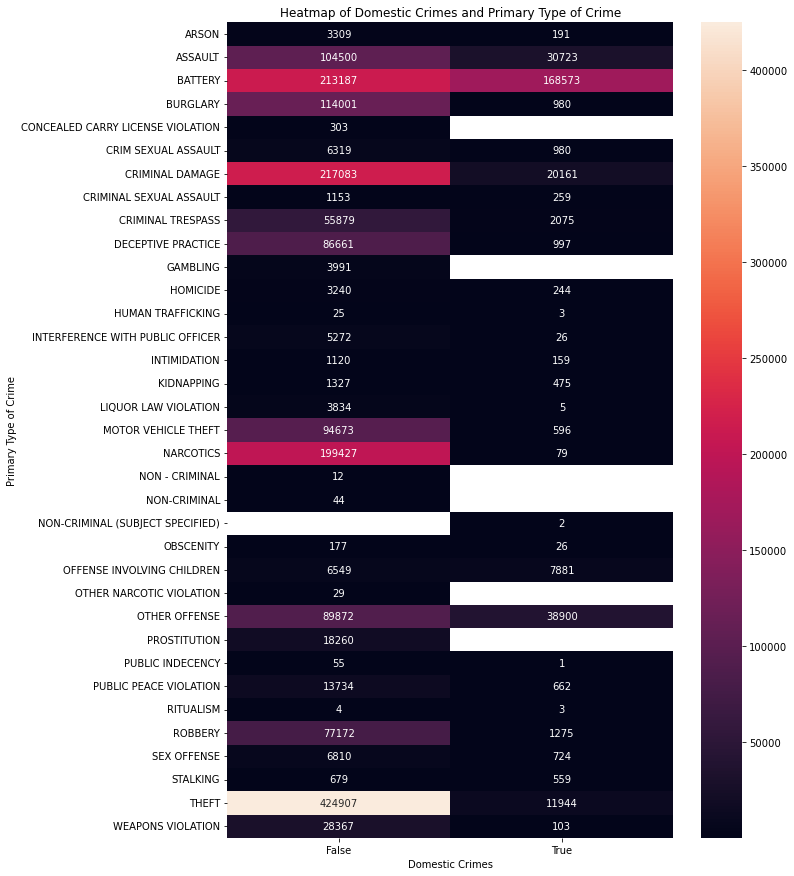

In [45]:
# Placing Domestic into the cr_st function in relation to the PrimaryType feature
plt.figure(figsize = [10,15])
cr_st('Domestic','Domestic Crimes','Primary Type of Crime', 'Heatmap of Domestic Crimes and Primary Type of Crime')

### Multivariate Analysis

#### Can a representation of the crime locations in Chicago be seen?

<Figure size 1080x720 with 0 Axes>

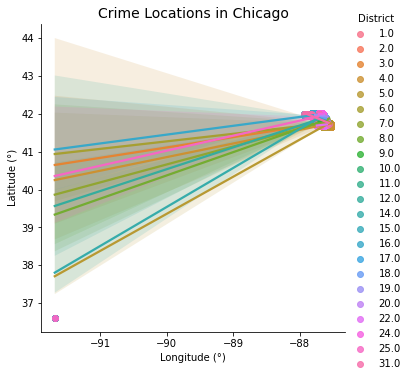

In [47]:
# Scatterplot function to show the Longitude and Latitude features against the Districts for crimes
plt.figure(figsize=(15,10))
base_color = sns.color_palette()[2]
sns.lmplot(data=crime_df, y='Latitude', x='Longitude', hue='District')
plt.title('Crime Locations in Chicago', fontsize=14)
plt.ylabel('Latitude (°)', fontsize=10)
plt.xlabel('Longitude (°)', fontsize=10);

#### Insight
>The above scatterplot shows the overview locations of the Districts in correlation with their latitude and longitude points. It is interesting to note there is an outlier in the data.

#### In which locations will crime likely happen at different periods of the day and during the week?

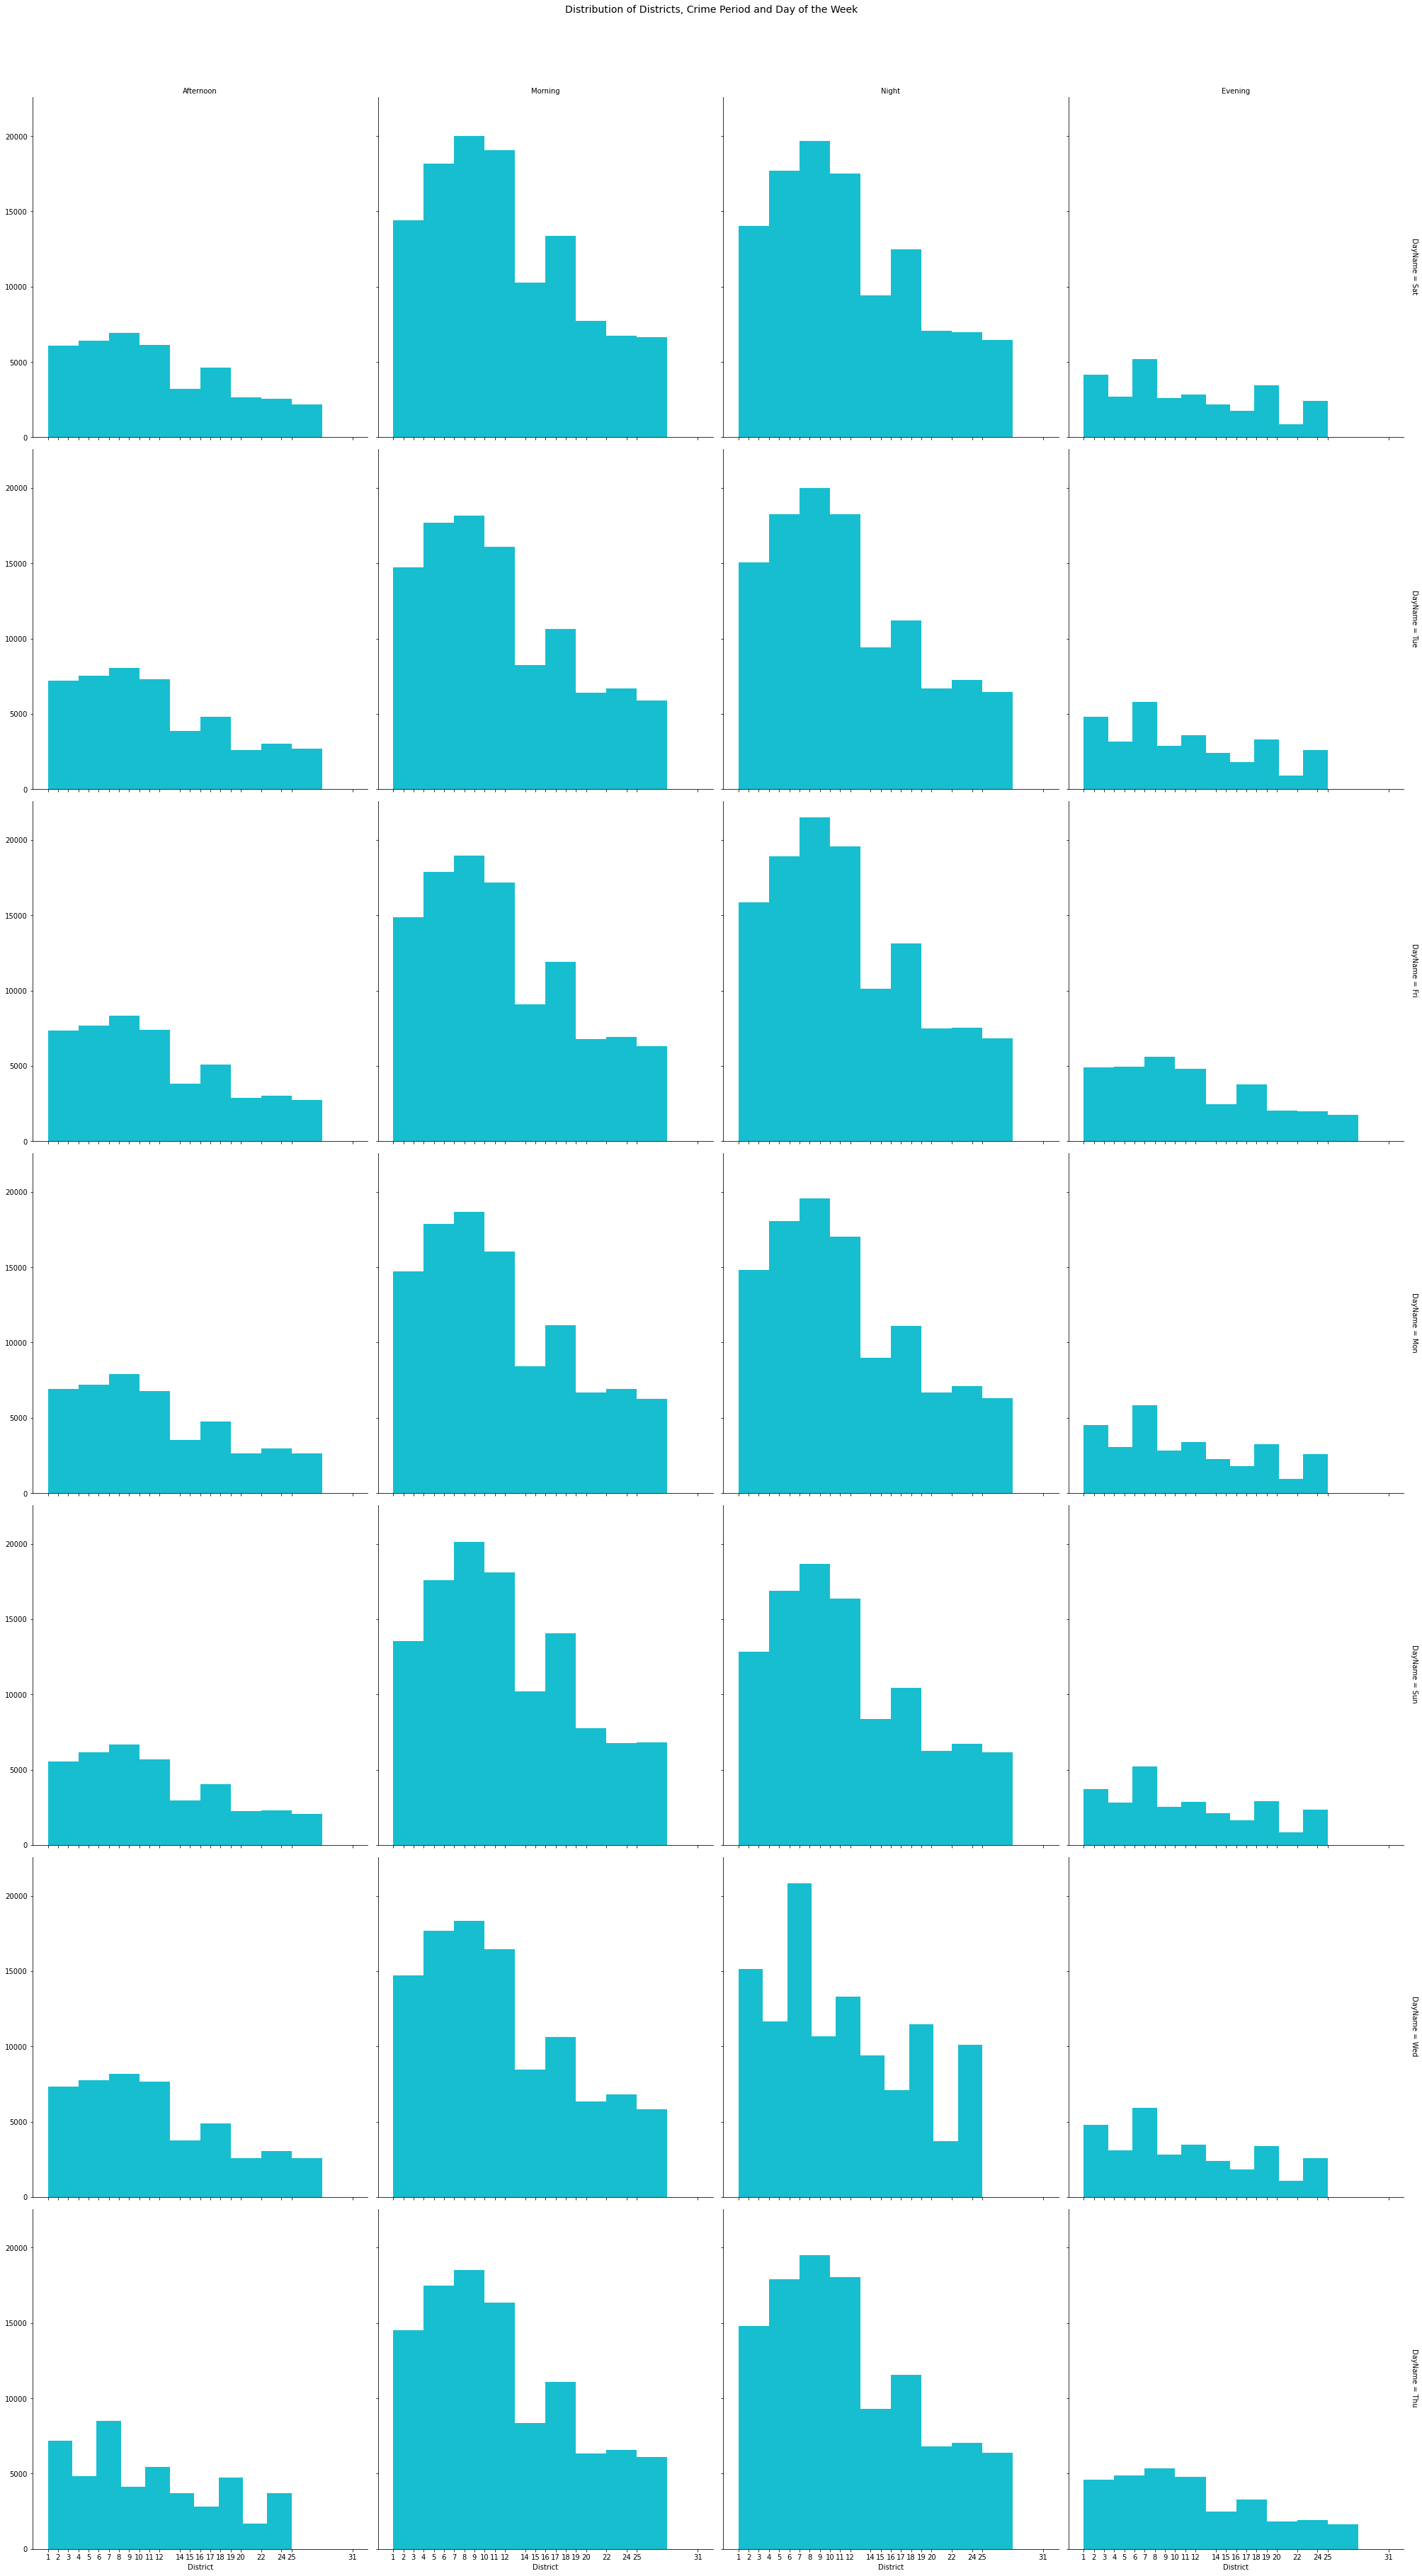

In [48]:
# Multivariate histograms creation for the distribution of the District against Period and DayNameof crime
# Using facetgrid to show multiple plots
base_color = sns.color_palette()[9]
g = sns.FacetGrid(crime_df, col='Period', row='DayName', margin_titles=True, height=7)
g.map(plt.hist, 'District', color=base_color)
g.set_axis_labels('District')
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Distribution of Districts, Crime Period and Day of the Week', y=1.03, fontsize=14)
ticks = [1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,22,24,25,31]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

#### Insight
>Multivariate histogram showing the Districts have higher crime rates in the mornings and at night time still emphasing that those periods that are not safe for people to go out. It can also be seen that the crimes are more prevalent in Districts 4-11. The third feature added which is the day of the week, gives a majorly uniform overview of the crimes occuring in the different districts and the different periods of the day.

#### In which locations will crime likely happen at different periods of the day and will it occur during the weekday or weekend?

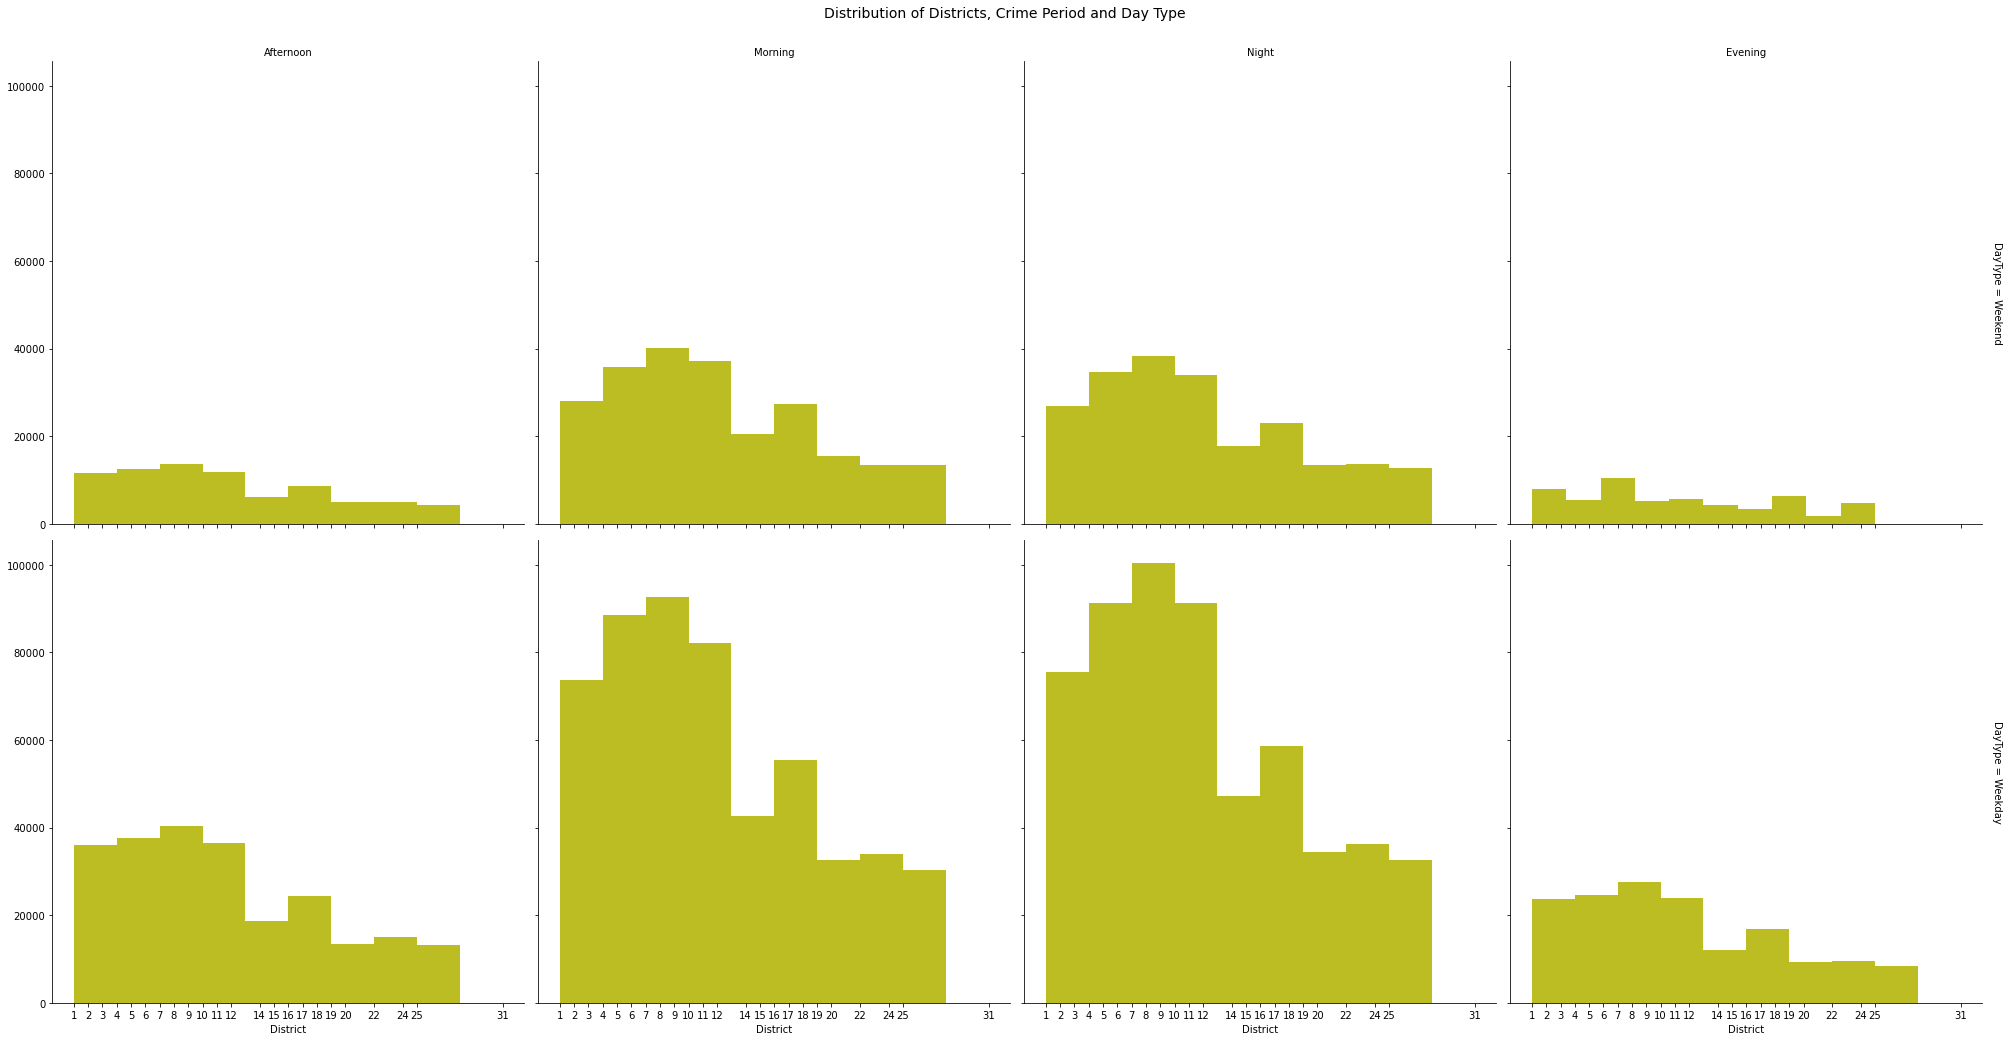

In [49]:
# Multivariate histograms creation for the distribution of the District against Period and DayType of crime
# Using facetgrid to show multiple plots
base_color = sns.color_palette()[8]
g = sns.FacetGrid(crime_df, col='Period', row='DayType', margin_titles=True, height=7)
g.map(plt.hist, 'District', color=base_color)
g.set_axis_labels('District')
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Distribution of Districts, Crime Period and Day Type', y=1.03, fontsize=14)
ticks = [1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,22,24,25,31]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

#### Insight
>The Districts in the above multivariate charts still shows higher crime rates in the mornings and at night time still emphasing that those periods that are not safe for people to go out. It can also be seen that the crimes are more prevalent in Districts 4-11. The third feature added which is the day type, further detailing a spike of crimes occuring during the weekdays.

### Conclusion

> This project succeeded in giving some valuable insights on the crimes in the Chicago crime dataset. 
It can be seen from the data that Chicago is a relatively unsafe place to live in due the number of crimes and the various types of crimes present. Individuals with children or the elderly should generally avoid this location especially since a lot of arrests were not made for these crimes.
The police department needs to be funded, adequatly trained and equipped so as to increase the number of arrests made for crimes. 
>Some Districts are more unsafe than other such as Districts 4-11. Generally, moving with a group of people or with safety devices may be beneficial especially during the weekdays, at morning or night time, in certain locations such as streets, and finally in summertime. 
>The above can be used in addition with other features to create policies that may keep the citizen living in Chicago safe.

> Data wrangling, data visualisation, and feature engineering techniques were performed in the project.